# 06 자전거 대여 수요 예측
* 미션
    * [자전거 대여 수량 예측](https://www.kaggle.com/c/bike-sharing-demand)
* 평가지표
    * RMSLE
    * ![](images/bike_metrix.PNG)
        * $n$ is ther number of hours in the test set
        * $p_i$ is your  predicted count
        * $a_i$ is the actual count
        * $log(x)$ is the natural logarithm

## 6.1 경진대회 이해
* 자전거 대여 수요 예측이 목표
* 피쳐(feature)
    * 원하는 값을 예측하기 위해 활용하는 데이터
* 타깃값(target value)
    * 예측해야 할 값

## 6.2 경진대회 접속 방법 및 세부 메뉴
* Data 메뉴
    * ![](images/kaggle_data.PNG)
        * Missing : 결측값 비율
* Code 메뉴
    * 추천순, 점수순으로 정렬해서 상위권 코드 참고
* Discussion 메뉴
    * 추천순으로 정렬해서 상위권 글 참고
* Leaderboard 메뉴
    * 참가자의 등수와 점수 확인 가능
    * ![](images/kaggle_public_private.PNG)
    * Public과 Private으로 나눠짐
        * Public Leaderboard은 대회 종료 전까지 점수와 등수를 확인하는 곳
        * Private Leaderboard 기준으로 메달과 상급 수여
        * 평가하는 data가 다름
* Rules 메뉴
    * 대회 규정 확인
    * 프라이빗 코드를 팀원 외 다른 참가자와 공유하면 안됨
    * 외부 데이터 사용 불가능한 대회는 캐글에서 제공한 데이터만 사용
    * 사전 훈련된 외부 모델 사용을 불허나는 대회에서는 본인이 훈련한 모델만 사용
* Team 메뉴
    * 팀원은 최대 5명까지 꾸릴 수 있음
    * 초대할 모든 팀원들이 대회에 참여한 상태여야만 초대 가능

## 6.3 탐색적 데이터 분석
* ![](images/kaggle_eda.PNG)
* [참고한 코드](https://www.kaggle.com/code/viveksrinivasan/eda-ensemble-model-top-10-percentile)

In [540]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [541]:
data_path = '../data/06_bike/'

In [542]:
train_df = pd.read_csv(data_path + 'train.csv')
test_df = pd.read_csv(data_path+'test.csv')
submission_df = pd.read_csv(data_path+'sampleSubmission.csv')

In [543]:
print(train_df.shape, test_df.shape, submission_df.shape)

(10886, 12) (6493, 9) (6493, 2)


In [544]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* datetime
    - hourly date + timestamp
* season
    - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday
    - whether the day is considered a holiday
* workingday
    - whether the day is neither a weekend nor holiday
* weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp
    - temperature in Celsius
* atemp
    - "feels like" temperature in Celsius
* humidity
    - relative humidity
* windspeed
    - wind speed
* casual
    - number of non-registered user rentals initiated
* registered
    - number of registered user rentals initiated
* count
    - number of total rentals

In [545]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [546]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [547]:
train = train_df.copy()

In [548]:
train.datetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [549]:
train['tmp_d'] = train['datetime'].apply(lambda d: d.split(' '))
train['date'] = train['datetime'].apply(lambda d: d.split(' ')[0])
train['year'] = train['tmp_d'].apply(lambda d: d[0].split('-')[0])
train['month'] = train['tmp_d'].apply(lambda d: d[0].split('-')[1])
train['day'] = train['tmp_d'].apply(lambda d: d[0].split('-')[2])
train['hour'] = train['tmp_d'].apply(lambda d: d[1].split(':')[0])
train['min'] = train['tmp_d'].apply(lambda d: d[1].split(':')[1])
train['sec'] = train['tmp_d'].apply(lambda d: d[1].split(':')[2])
train['weekday'] = train['tmp_d'].apply(lambda s: calendar.day_name[datetime.strptime(s[0], '%Y-%m-%d').weekday()])
train = train.drop(columns=['tmp_d'])  # train.drop('tmp_d', axis=1)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,min,sec,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [550]:
from datetime import datetime
import calendar

In [551]:
sample_date = train['date'][100]
print(sample_date)

2011-01-05


In [552]:
print(datetime.strptime(sample_date, '%Y-%m-%d'), type(datetime.strptime(sample_date, '%Y-%m-%d')))

2011-01-05 00:00:00 <class 'datetime.datetime'>


In [553]:
print(datetime.strptime(sample_date, '%Y-%m-%d').weekday())

2


In [554]:
print(calendar.day_name[datetime.strptime(sample_date, '%Y-%m-%d').weekday()])

Wednesday


In [555]:
train['season'] = train['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter',
})

In [556]:
train['weather'] = train['weather'].map({
    1: 'Clear',
    2: 'Mist, Few Clouds',
    3: 'Light Snow, Rain, Thunderstorm',
    4: 'Heavy Rain, Thunderstorm, Snow, Fog',
})

In [557]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,min,sec,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


C:\Users\dukim\miniconda3\envs\musthave_mldl_problem_solving_strategy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


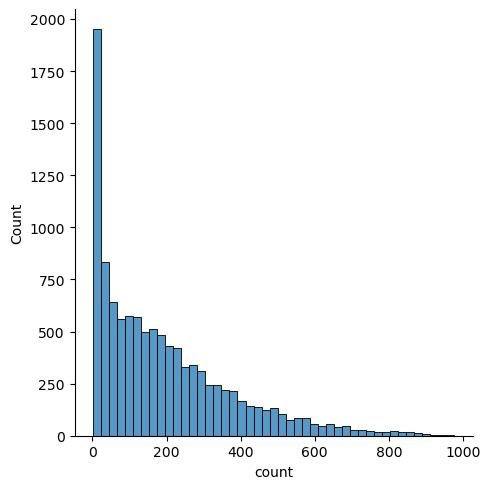

In [558]:
sns.displot(data=train, x='count')

C:\Users\dukim\miniconda3\envs\musthave_mldl_problem_solving_strategy\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


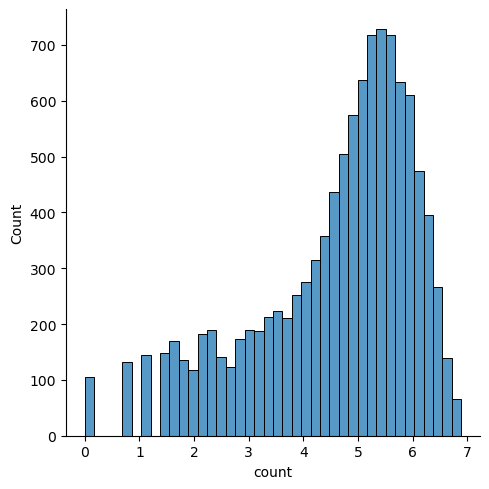

In [559]:
sns.displot(x=np.log(train['count']))

x : 0.1, y : -2.3025850929940455


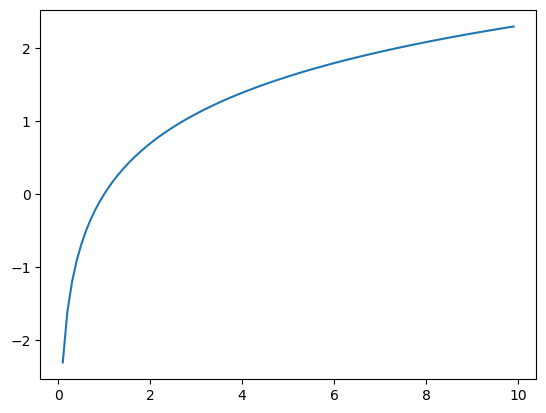

In [560]:
x = np.arange(0.1, 10, 0.1)
y = np.log(x)
# log(0) : -inf
# log(1) : 0
plt.plot(x,y)
print(f'x : {x[0]}, y : {y[0]}')

### target에 np.log 를 활용
* 왜도가 심한 형태에서 정규분포에 가까워짐
### 주의 사항
* 실제값 복원
    * log(y)를 y로 변환하기 위해서는 지수변환하면 됨
    * $y = e^{log(y)}$

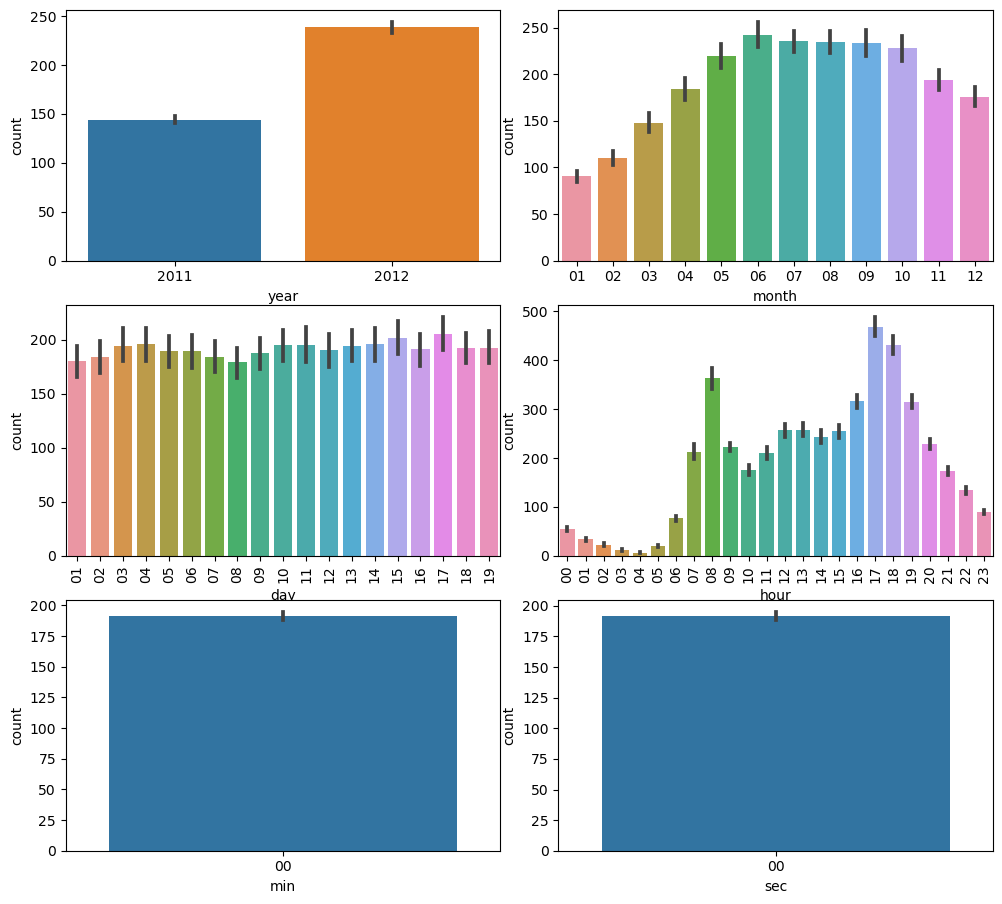

In [561]:
# barplot
figure, axes = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(10, 9)
plt.tight_layout()
sns.barplot(data=train, x='year', y='count', ax=axes[0, 0])
sns.barplot(data=train, x='month', y='count', ax=axes[0, 1])
sns.barplot(data=train, x='day', y='count', ax=axes[1, 0])
sns.barplot(data=train, x='hour', y='count', ax=axes[1, 1])
sns.barplot(data=train, x='min', y='count', ax=axes[2, 0])
sns.barplot(data=train, x='sec', y='count', ax=axes[2, 1])
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

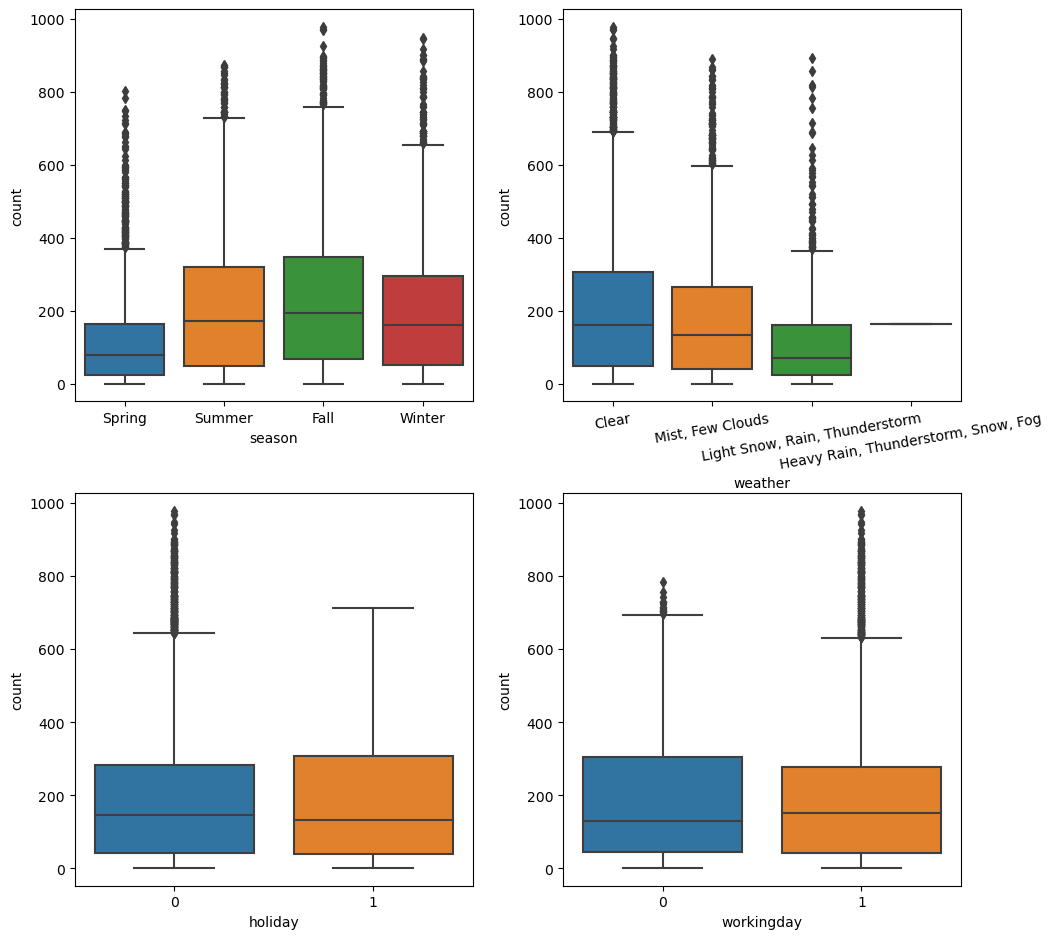

In [562]:
# boxplot
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(data=train, x='season', y='count', ax=axes[0,0])
sns.boxplot(data=train, x='weather', y='count', ax=axes[0,1])
sns.boxplot(data=train, x='holiday', y='count', ax=axes[1,0])
sns.boxplot(data=train, x='workingday', y='count', ax=axes[1,1])

axes[0,1].tick_params(labelrotation=10, axis='x')

<Axes: xlabel='hour', ylabel='count'>

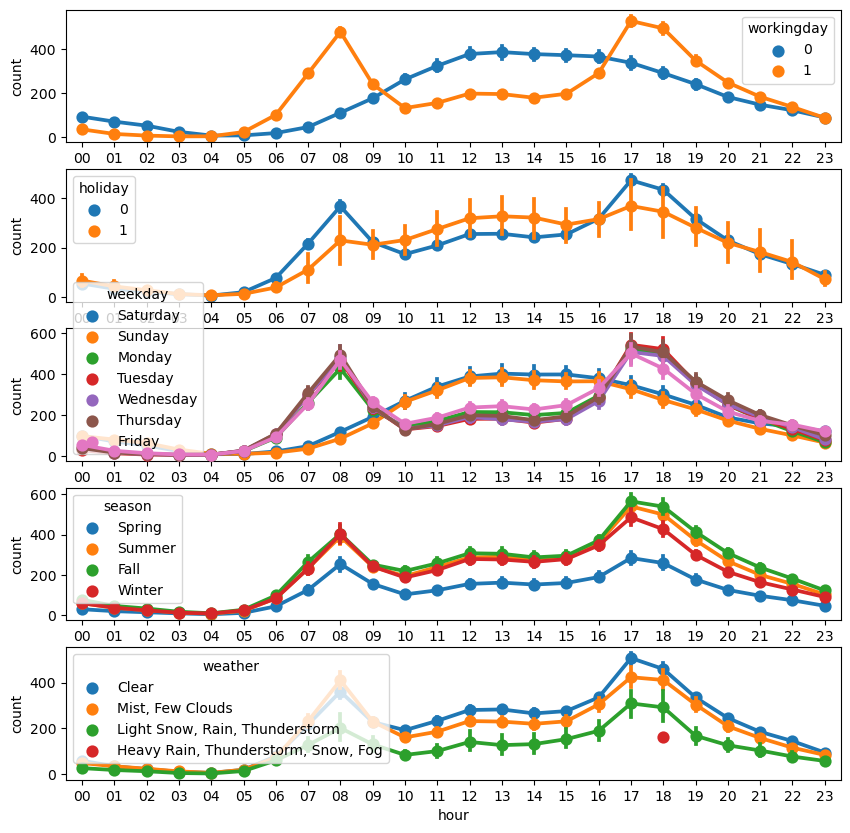

In [563]:
# pointplot
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(10,10)

sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=axes[0])
sns.pointplot(data=train, x='hour', y='count', hue='holiday', ax=axes[1])
sns.pointplot(data=train, x='hour', y='count', hue='weekday', ax=axes[2])
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=axes[3])
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=axes[4])

<Axes: xlabel='humidity', ylabel='count'>

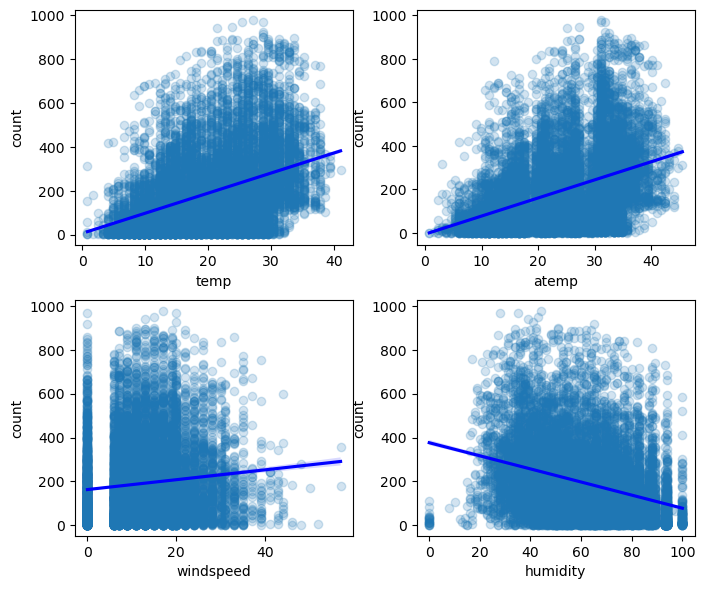

In [564]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7, 6)

sns.regplot(data=train, x='temp', y='count', ax=axes[0, 0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(data=train, x='atemp', y='count', ax=axes[0, 1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(data=train, x='windspeed', y='count', ax=axes[1, 0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(data=train, x='humidity', y='count', ax=axes[1, 1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

### windspeed 그래프가 이상한 이유
* 결측값이 있어서 위와 같이 나옴
    * 삭제하거나 다른 값으로 대체해야 함

[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

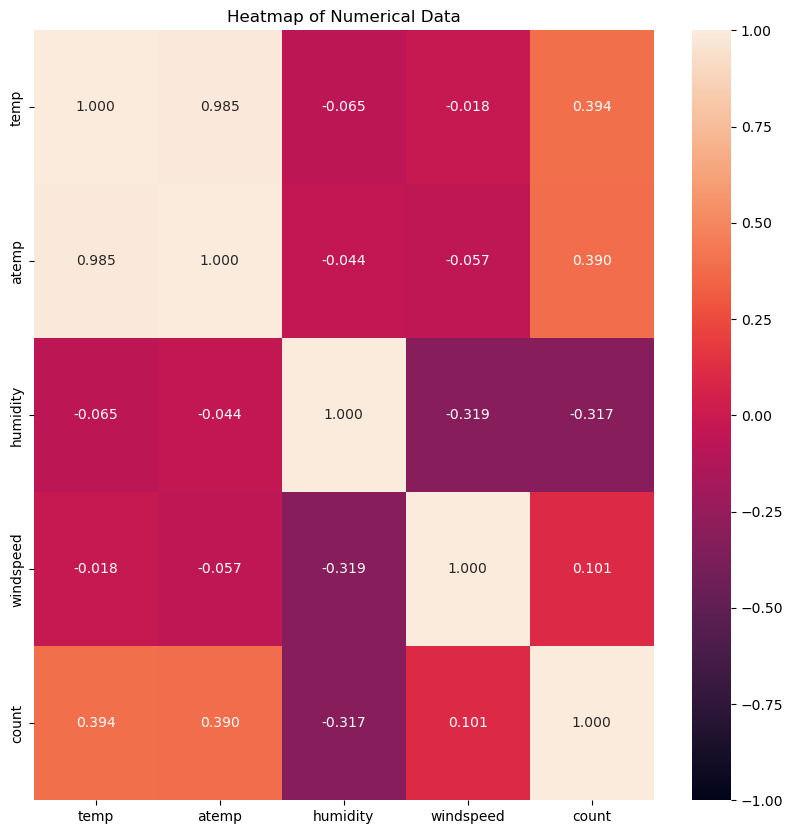

In [565]:
# 히트맵
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True, vmin=-1, vmax=1, fmt='.3f')
ax.set(title='Heatmap of Numerical Data')

In [566]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,min,sec,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


### 분석 정리
* 타깃값 변환
    * 타깃값(count)이 0 근처로 치우쳐 있으므로 로그변환하여 정규분포에 가깝에 만들어서 활용
    * 예측한 결과를 다시 지수변환해 count로 복원해야함
* 파생 피처 추가
    * datetime 피처는 year, month, day, hour, min, sec 피처 생성
    * 요일(weekday) 피처 추가
* 피처 제거
    * 훈련 데이터에만 있는 casual과 registered 피처 제거
    * datetime 피처 제거
    * date 피처 제거(year, month, day 피처 활용)
    * month 피처는 season 피처의 세부 분류이므로 제거
    * day 피처는 분별력이 없고 데이터가 1~19일까지만 있으므로 제거
    * min, sec 피처에는 막대 그래프 확인 결과 특별한 정보가 없으므로 제거
    * windspeed 피처는 산점도 그래프를 통해 결측값을 확인하고 히트맵을 통해 상관관계가 약함을 확인하여 제거
* 이상치 제거
    * 포인트 플롯 확인 결과 weather가 4인 데이터는 이상치

## 6.4 베이스라인 모델

In [567]:
train = train_df.copy()
# 이상치 제거
train = train[train['weather'] != 4]

In [568]:
print(len(train), len(test_df))

10885 6493


In [569]:
# 데이터 합치기
all_data = pd.concat([train, test_df], ignore_index=True)
all_data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
17377,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [570]:
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [571]:
# 파생 피처 추가
all_data['datetime'] = pd.to_datetime(all_data['datetime'])

all_data['year'] = all_data['datetime'].dt.year
all_data['month'] = all_data['datetime'].dt.month
all_data['day'] = all_data['datetime'].dt.day
all_data['hour'] = all_data['datetime'].dt.hour
all_data['weekday'] = all_data['datetime'].dt.weekday

In [572]:
# 피처 제거
removal_feature = ['casual', 'registered', 'datetime', 'month', 'day', 'windspeed']
all_data = all_data.drop(columns=removal_feature)

### 피처 선택(feature selection)
* 모델링 시 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 작업
* 타깃값 예측과 관련 없는 피처는 제거
* 탐색적, 데이터 분석, 피처 중요도(feature importance), 상관관계 메트릭스 활용

In [573]:
# 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]
y = X_train['count']
X_train = X_train.drop(columns=['count'])
X_test = X_test.drop(columns=['count'])

X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,0,5
1,1,0,0,1,9.02,13.635,80,2011,1,5
2,1,0,0,1,9.02,13.635,80,2011,2,5
3,1,0,0,1,9.84,14.395,75,2011,3,5
4,1,0,0,1,9.84,14.395,75,2011,4,5


In [574]:
# 평가지표 계산 함수 작성
def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    return np.sqrt(np.mean((log_true-log_pred)**2))

In [575]:
### 모델 훈련
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
log_y = np.log(y)
linear_reg_model.fit(X_train, log_y)

LinearRegression()

### 정리
* ![](images/bike_metrix.PNG)
    * $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3$
    * $y = \theta_0 + \theta X$
    * $x_n$ 은 독립 변수(피처)
    * $\theta_n$ 는 회귀 계수(가중치)
    * $y$ 는 종속 변수(타겟)
* 훈련
    * 피처와 타깃값이 주어졌을 때 최적의 가중치를 찾는 과정
* 예측
    * 최적의 가중치를 훈련된 모델에서 새로운 데이터가 주어졌을 때 타깃값을 추정하는 과정
* 탐색적 데이터 분석
    * 예측에 도움이 될 피처를 정리하고 적절한 모델링 방법을 탐색하는 과정
* 피처 엔지니어링
    * 정리된 피처들을 훈련에 적합하도록, 성능 향상에 도움이 되도록 가종하는 과정

In [576]:
### 모델 성능 검증
preds = linear_reg_model.predict(X_train)
print(f'RMSLE : {rmsle(log_y, preds, True):.4f}')

RMSLE : 1.0205


In [577]:
### 예측 및 결과 제출
linearreg_preds = linear_reg_model.predict(X_test)
submission_df['count'] = np.exp(linearreg_preds)
submission_df.to_csv('submission.csv', index=False)

## 6.5 성능 개선 I : 릿지 회귀 모델
### 릿지 회귀 모델
* L2 규제를 적용한 선형 회귀 모델
* 규제(regularization)란?
    * 모델이 훈련 데이터에 과대적합되지 않도록 해주는 방법
### 모델 성능 개선 프로세스
* ![](images/base_vs_enhanced.PNG)

In [578]:
# 패키지 import
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [579]:
# 모델 생성
ridge_model = Ridge()

In [580]:
# 그리드서치 객체 생성
ridge_params = {
    'max_iter': [3000],
    'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

gridsearch_ridge_model = GridSearchCV(
    estimator=ridge_model,  # 릿지 모델
    param_grid=ridge_params,# 하이퍼 파라미터
    scoring=rmsle_scorer,   # 평가 지표, alternative : 'accuracy', 'f1', 'roc_auc', 'recall'
    cv=5                    # 교차 검증 분할 수
)

In [581]:
# 그리드서치 수행
gridsearch_ridge_model.fit(X_train, log_y)
print(f'best parameter : {gridsearch_ridge_model.best_params_}')

best parameter : {'alpha': 0.1, 'max_iter': 3000}


In [582]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

#평가
print(f'ridge RMSLE : {rmsle(log_y, preds, True):.4f}')

ridge RMSLE : 1.0205


In [583]:
pd.DataFrame([gridsearch_ridge_model.best_estimator_.coef_, X_train.columns]).T

,0,1
0,0.182107,season
1,0.034177,holiday
2,0.009096,workingday
3,0.001332,weather
4,0.011432,temp
5,0.03367,atemp
6,-0.01515,humidity
7,0.439493,year
8,0.103461,hour
9,0.030148,weekday


## 6.6 성능 개선 II : 라쏘 회귀 모델
### 라쏘 회귀 모델
* L1 규제를 적용한 선형 회귀 모델

In [584]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {
    'max_iter': [3000],
    'alpha': lasso_alpha
}
# 그리드서치 수행
gridsearch_lasso_model = GridSearchCV(
    estimator=lasso_model,
    param_grid=lasso_params,
    scoring=rmsle_scorer,
    cv=5,
)

# 그리드서치 수행
gridsearch_lasso_model.fit(X_train, log_y)
print(f'best hyperparameter : {gridsearch_lasso_model.best_params_}')

best hyperparameter : {'alpha': 0.00125, 'max_iter': 3000}


In [585]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'Lasso RMSLE : {rmsle(log_y, preds, True):.4f}')

Lasso RMSLE : 1.0205


## 6.7 성능 개선 III : 랜덤 포레스트 회귀 모델
### 랜덤 포레스트
* 훈련 데이터를 랜덤하게 샘플링한 모델 n개를 각각 훈련하여 나온 결과를 평균을 계산함

In [586]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {
    'random_state': [42],
    'n_estimators': [100, 120, 140],
}
gridsearch_random_forest_model = GridSearchCV(
    estimator=randomforest_model,
    param_grid=rf_params,
    scoring=rmsle_scorer,
    cv=5
)
gridsearch_random_forest_model.fit(X_train, log_y)
print(f'best hyperparameter : {gridsearch_random_forest_model.best_params_}')

best hyperparameter : {'n_estimators': 140, 'random_state': 42}


In [587]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
# 평가
print(f'random forest RMSLE : {rmsle(log_y, preds, True):.4f}')

random forest RMSLE : 0.1127


Text(0.5, 1.0, 'Predicted Test Data Distribution')

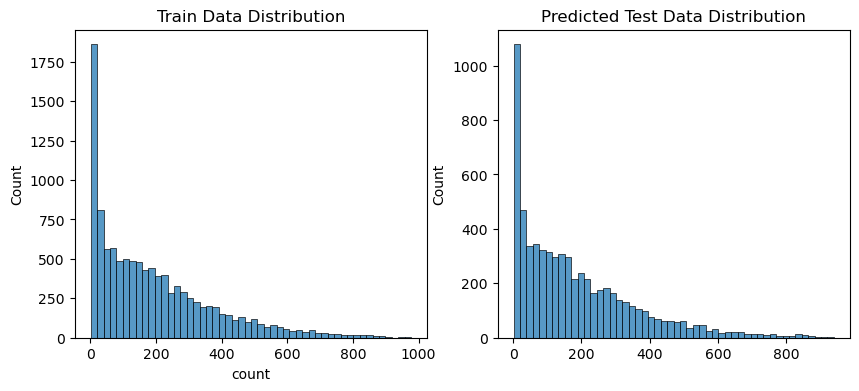

In [588]:
# 결과 확인
randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution')

In [589]:
# 제출
submission_df['count'] = np.exp(randomforest_preds)
submission_df.to_csv('submission.csv', index=False)

## 학습 마무리
### 핵심 요약
* 캐글 경진대회 프로세스
    * 경진대회 이해 -> 탐색적 데이터 분석 -> 베이스라인 모델 -> 성능 개선
* 회귀 모델의 경우 타깃값이 정규분포에 가까울수록 회귀 모델의 성능이 좋음
    * 한쪽으로 치우친 타깃값은 log <-> exp 함수를 통해 변환과 복원하여 사용
* 훈련 데이터의 이상치를 제거하면 일반화 성능이 좋아짐
* 기존 피처를 분해/조합하여 모델링에 도움되는 새로운 피처 추가
* 불필요한 피처는 제거
* 선형 회귀, 릿지, 라쏘 모델은 회귀 문제를 대표적인 모델
    * 최상의 성능을 기대하기는 어려움
* 랜덤 포레스트 회귀
    * 여러 모델을 묶어 더 나은 성능을 이끌어냄
* 그리드서치
    * 교차 검증으로 최적의 하이퍼파라미터 값을 찾아주는 기법

In [590]:
# season -> month
train = train_df.copy()
# 이상치 제거
train = train[train['weather'] != 4]
# 데이터 합치기
all_data = pd.concat([train, test_df], ignore_index=True)
# 파생 피처 추가
all_data['datetime'] = pd.to_datetime(all_data['datetime'])

all_data['year'] = all_data['datetime'].dt.year
all_data['month'] = all_data['datetime'].dt.month
all_data['day'] = all_data['datetime'].dt.day
all_data['hour'] = all_data['datetime'].dt.hour
all_data['weekday'] = all_data['datetime'].dt.weekday

# 피처 제거
removal_feature = ['casual', 'registered', 'datetime', 'season', 'day', 'windspeed'] # month -> season
all_data = all_data.drop(columns=removal_feature)

# 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]
y = X_train['count']
X_train = X_train.drop(columns=['count'])
X_test = X_test.drop(columns=['count'])

# log
log_y = np.log(y)

# 모델 생성
randomforest_season_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {
    'random_state': [42],
    'n_estimators': [100, 120, 140],
}
gridsearch_random_forest_season_model = GridSearchCV(
    estimator=randomforest_season_model,
    param_grid=rf_params,
    scoring=rmsle_scorer,
    cv=5
)
gridsearch_random_forest_season_model.fit(X_train, log_y)
print(f'best hyperparameter : {gridsearch_random_forest_season_model.best_params_}')

# 예측
preds = gridsearch_random_forest_season_model.best_estimator_.predict(X_train)
# 평가
print(f'random forest RMSLE : {rmsle(log_y, preds, True):.4f}')
# 결과 확인
randomforest_season_preds = gridsearch_random_forest_season_model.best_estimator_.predict(X_test)
# 제출
submission_df['count'] = np.exp(randomforest_season_preds)
submission_df.to_csv('submission.csv', index=False)

best hyperparameter : {'n_estimators': 120, 'random_state': 42}
random forest RMSLE : 0.1089


Text(0.5, 1.0, 'Predicted Test Data Distribution For Month')

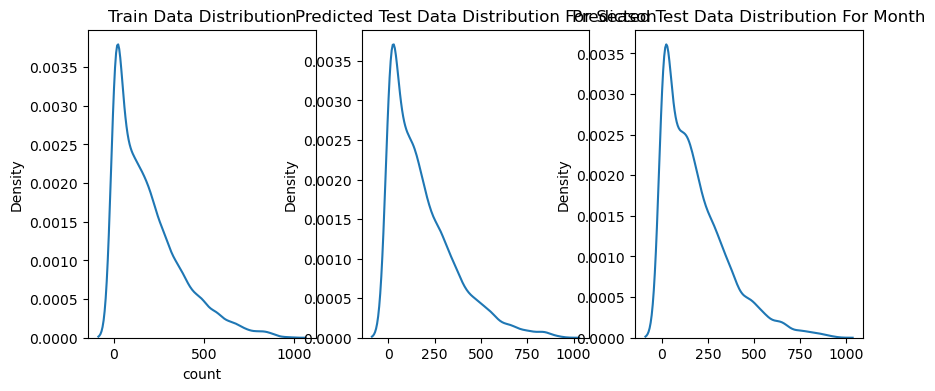

In [594]:
# 결과 확인
figure, axes = plt.subplots(ncols=3)
figure.set_size_inches(10, 4)

sns.kdeplot(y, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.kdeplot(np.exp(randomforest_preds), ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution For Season')
sns.kdeplot(np.exp(randomforest_season_preds), ax=axes[2])
axes[2].set_title('Predicted Test Data Distribution For Month')